# Russian and Ukrainian war

https://en.wikipedia.org/wiki/Russo-Ukrainian_War

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from tabulate import tabulate
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['SPY','PM','PEP','MHK', 'MCD', 'EPAM', 'CCL', 'PVH', 'WAB']
start = '2022-02-28'
end = '2022-03-25'


# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  9 of 9 completed


,CCL,EPAM,MCD,MHK,PEP,PM,PVH,SPY,WAB
Date,,,,,,,,,
2022-02-28,20.330000,207.750000,244.770004,140.779999,162.670105,99.720963,97.841286,435.277771,92.820000
2022-03-01,18.860001,211.210007,239.630005,137.059998,161.209702,100.086029,89.395493,428.648376,88.790001
2022-03-02,19.020000,245.169998,240.940002,142.860001,163.445007,101.171341,94.053169,436.533875,93.190002
2022-03-03,18.270000,212.979996,236.649994,139.860001,163.270004,101.112144,89.475449,434.360596,93.050003
2022-03-04,17.230000,198.520004,235.809998,137.350006,165.750000,98.467918,79.120613,430.831573,91.559998


In [3]:
df.tail()

,CCL,EPAM,MCD,MHK,PEP,PM,PVH,SPY,WAB
Date,,,,,,,,,
2022-03-18,19.459999,294.470001,238.919998,144.509995,162.789993,92.646667,83.730003,444.519989,96.160004
2022-03-21,18.950001,284.049988,235.320007,139.630005,162.559998,92.883461,81.250000,444.390015,96.540001
2022-03-22,18.930000,303.540009,238.119995,139.050003,164.339996,92.400002,81.540001,449.589996,95.690002
2022-03-23,18.299999,306.649994,236.119995,136.110001,163.479996,91.250000,80.169998,443.799988,95.699997
2022-03-24,18.490000,288.049988,240.259995,135.029999,164.470001,92.580002,81.489998,450.489990,96.949997


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
0 years


In [5]:
from datetime import datetime

def calculate_years(start, end): 
    date_format = "%Y-%m-%d"
    a = datetime.strptime(start, date_format).year
    b = datetime.strptime(end, date_format).year
    years = b - a
  
    return years 

In [6]:
print(calculate_years(start, end), 'years')

0 years


In [7]:
Cash = 100000
print('Percentage of invest:')
percent_invest = [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
for i, x in zip(df.columns, percent_invest):
    cost = x * Cash
    print('{}: {}'.format(i, cost))

Percentage of invest:
CCL: 12500.0
EPAM: 12500.0
MCD: 12500.0
MHK: 12500.0
PEP: 12500.0
PM: 12500.0
PVH: 12500.0
SPY: 12500.0


In [8]:
print('Number of Shares:')
percent_invest = [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    print('{}: {}'.format(i, shares))

Number of Shares:
CCL: 614
EPAM: 60
MCD: 51
MHK: 88
PEP: 76
PM: 125
PVH: 127
SPY: 28


In [9]:
print('Beginning Value:')
percent_invest = [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    Begin_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
CCL: $12482.62
EPAM: $12465.0
MCD: $12483.27
MHK: $12388.64
PEP: $12362.93
PM: $12465.12
PVH: $12425.84
SPY: $12187.78


In [10]:
print('Current Value:')
percent_invest = [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
CCL: $11352.86
EPAM: $17283.0
MCD: $12253.26
MHK: $11882.64
PEP: $12499.72
PM: $11572.5
PVH: $10349.23
SPY: $12613.72


In [11]:
result = []
percent_invest = [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    result.append(Current_Value)
print('Total Value: $%s' % round(sum(result),2))

Total Value: $99806.93


In [12]:
print('Holding Period Return:') # Calculate without Dividends
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    HPR = (y - x) / x
    print('Holding Period Return: {}: {}%'.format(i, round(HPR,4)*100))

Holding Period Return:
Holding Period Return: CCL: -9.049999999999999%
Holding Period Return: EPAM: 38.65%
Holding Period Return: MCD: -1.8399999999999999%
Holding Period Return: MHK: -4.08%
Holding Period Return: PEP: 1.11%
Holding Period Return: PM: -7.16%
Holding Period Return: PVH: -16.71%
Holding Period Return: SPY: 3.49%
Holding Period Return: WAB: 4.45%


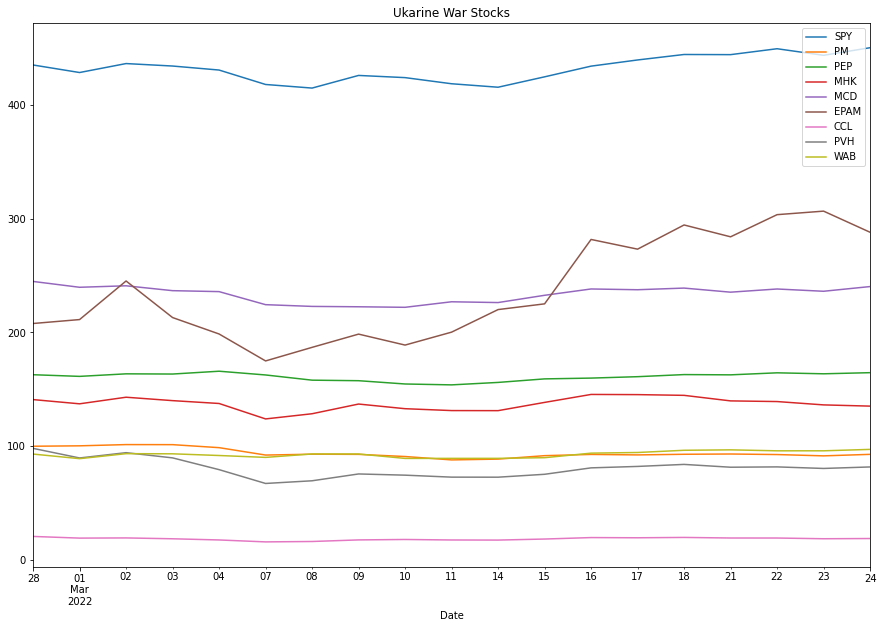

In [13]:
for s in symbols: 
    df[s].plot(label = s, figsize = (15,10))
plt.title('Ukarine War Stocks')
plt.legend()

In [14]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

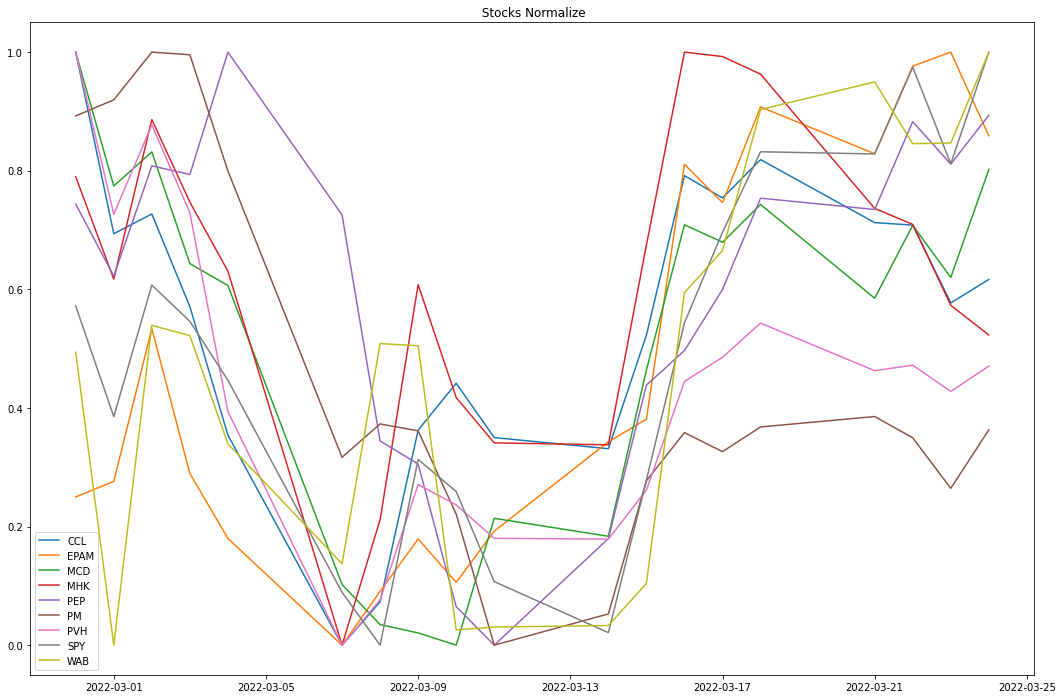

In [15]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title(' Stocks Normalize')
plt.legend(labels=normalize.columns)

In [16]:
df.min()

CCL      15.530000
EPAM    174.800003
MCD     222.000000
MHK     123.760002
PEP     153.729996
PM       87.683807
PVH      66.956657
SPY     414.960876
WAB      88.790001
dtype: float64

In [17]:
for s in symbols:
    print(s + ":",  df[s].max())

SPY: 450.489990234375
PM: 101.17134094238281
PEP: 165.75
MHK: 145.30999755859375
MCD: 244.77000427246094
EPAM: 306.6499938964844
CCL: 20.329999923706055
PVH: 97.8412857055664
WAB: 96.94999694824219


In [18]:
# Creating a Return Data Frame for all individual stocks: 
returns = pd.DataFrame()
for s in symbols: 
    returns[s + " Return"] = df[s].pct_change().dropna()
    
returns.head(4)

,SPY Return,PM Return,PEP Return,MHK Return,MCD Return,EPAM Return,CCL Return,PVH Return,WAB Return
Date,,,,,,,,,
2022-03-01,-0.015230,0.003661,-0.008978,-0.026424,-0.020999,0.016655,-0.072307,-0.086321,-0.043417
2022-03-02,0.018396,0.010844,0.013866,0.042317,0.005467,0.160788,0.008484,0.052102,0.049555
2022-03-03,-0.004978,-0.000585,-0.001071,-0.021000,-0.017805,-0.131297,-0.039432,-0.048672,-0.001502
2022-03-04,-0.008125,-0.026151,0.015190,-0.017946,-0.003550,-0.067894,-0.056924,-0.115728,-0.016013


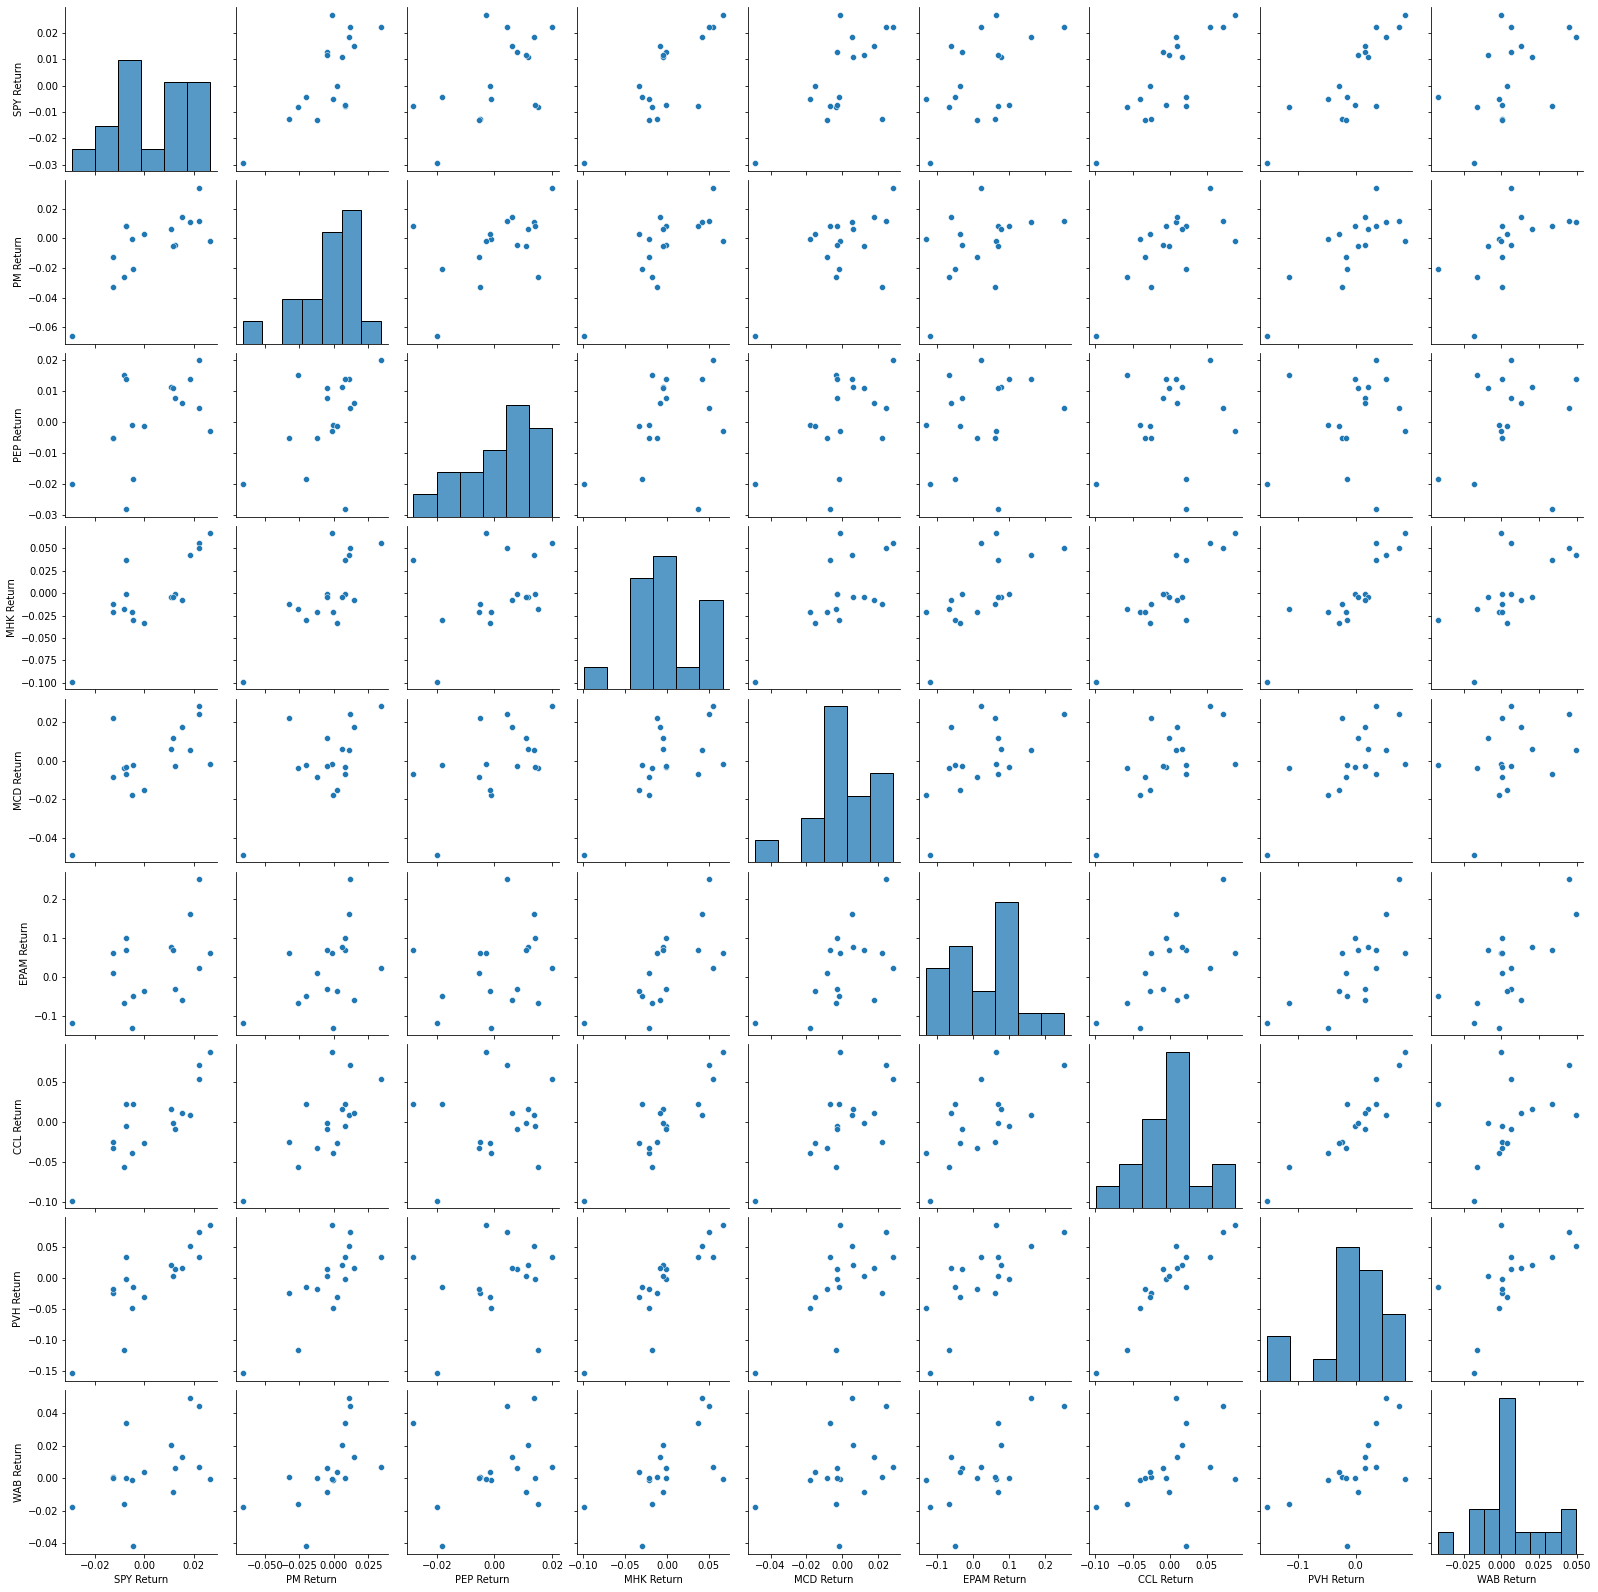

In [19]:
sns.pairplot(returns[1:] )

In [20]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmax())

SPY Return    2022-03-09
PM Return     2022-03-15
PEP Return    2022-03-15
MHK Return    2022-03-09
MCD Return    2022-03-15
EPAM Return   2022-03-16
CCL Return    2022-03-09
PVH Return    2022-03-09
WAB Return    2022-03-02
dtype: datetime64[ns]


In [21]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmin())

SPY Return    2022-03-07
PM Return     2022-03-07
PEP Return    2022-03-08
MHK Return    2022-03-07
MCD Return    2022-03-07
EPAM Return   2022-03-03
CCL Return    2022-03-07
PVH Return    2022-03-07
WAB Return    2022-03-01
dtype: datetime64[ns]


In [22]:
returns.corr()

,SPY Return,PM Return,PEP Return,MHK Return,MCD Return,EPAM Return,CCL Return,PVH Return,WAB Return
SPY Return,1.000000,0.695585,0.572047,0.800512,0.695309,0.494491,0.839426,0.836066,0.538230
PM Return,0.695585,1.000000,0.471373,0.734779,0.579835,0.450912,0.625262,0.703788,0.472020
PEP Return,0.572047,0.471373,1.000000,0.358661,0.546461,0.262199,0.226784,0.262113,0.278283
MHK Return,0.800512,0.734779,0.358661,1.000000,0.690348,0.686716,0.863297,0.872713,0.606307
MCD Return,0.695309,0.579835,0.546461,0.690348,1.000000,0.567331,0.696864,0.690928,0.444082
EPAM Return,0.494491,0.450912,0.262199,0.686716,0.567331,1.000000,0.601095,0.690370,0.620266
CCL Return,0.839426,0.625262,0.226784,0.863297,0.696864,0.601095,1.000000,0.926681,0.502541
PVH Return,0.836066,0.703788,0.262113,0.872713,0.690928,0.690370,0.926681,1.000000,0.656477
WAB Return,0.538230,0.472020,0.278283,0.606307,0.444082,0.620266,0.502541,0.656477,1.000000


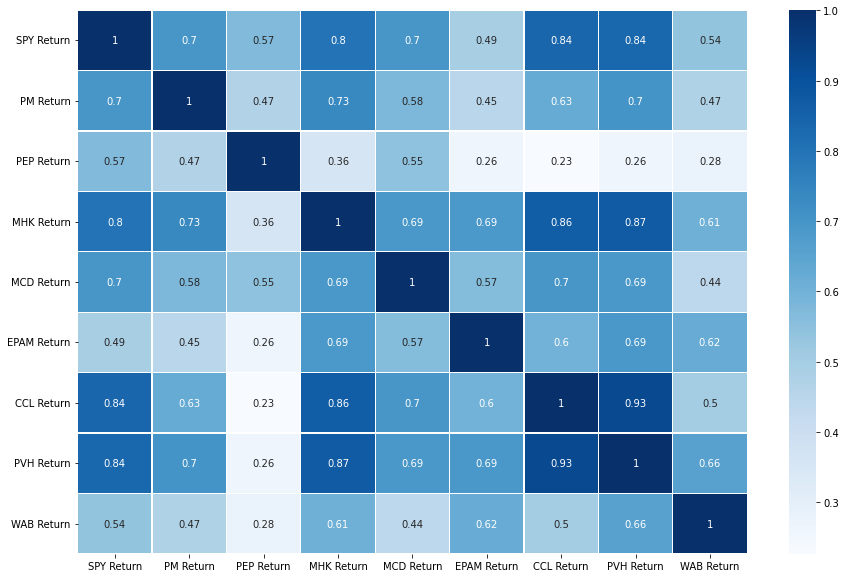

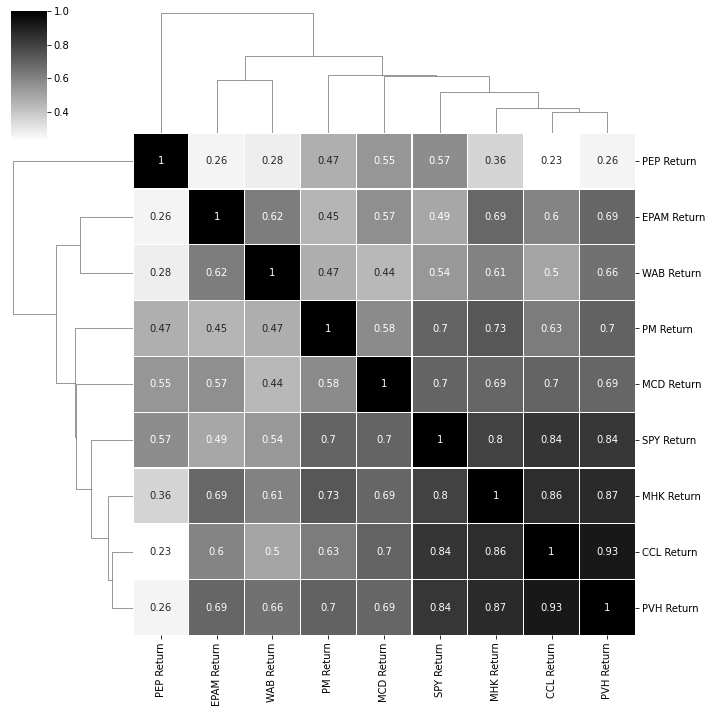

In [23]:
# Heatmap for return of all the stocks
plt.figure(figsize=(15,10))
sns.heatmap(returns.corr(), cmap="Blues",linewidths=.1, annot= True)


sns.clustermap(returns.corr(), cmap="binary",linewidths=.1, annot= True)

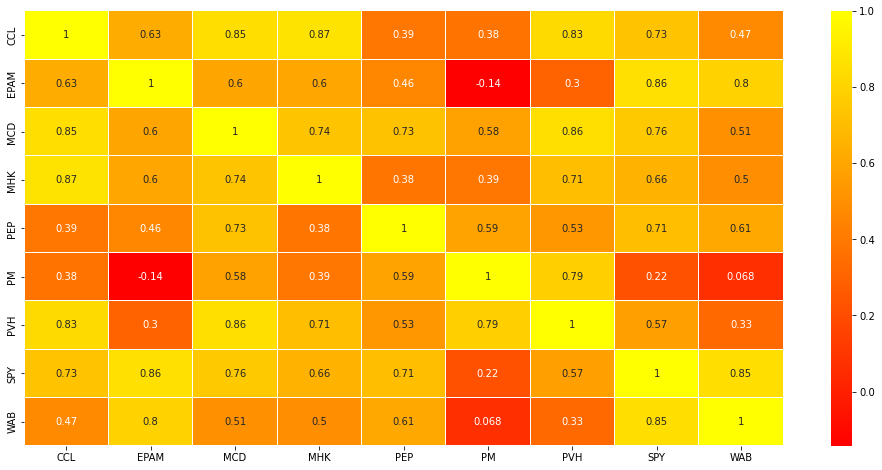

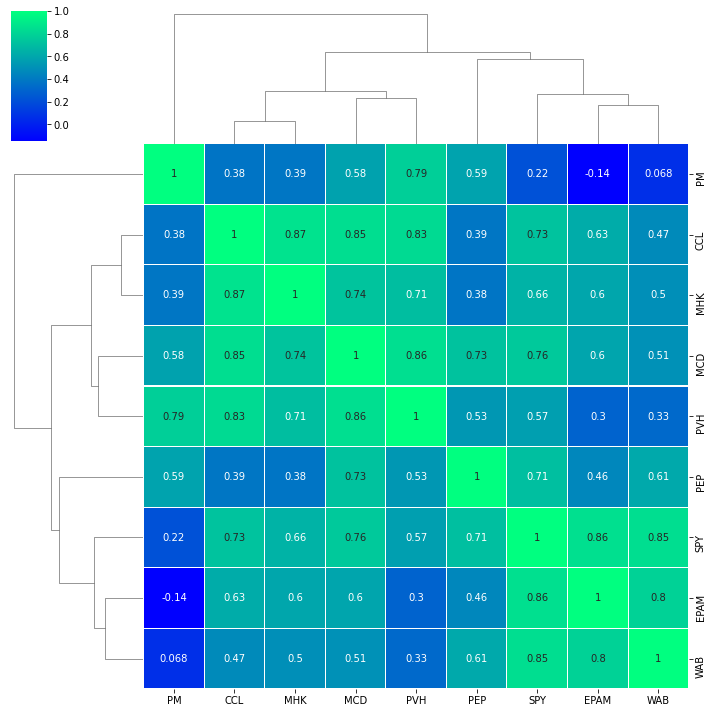

In [24]:
# heatmap for Adj. Close prices for all the stock
plt.figure(figsize = (17,8))
sns.heatmap(df.corr(), cmap="autumn",linewidths=.1, annot= True)


sns.clustermap(df.corr(), cmap="winter",linewidths=.1, annot= True)

In [25]:
returns = df.pct_change().dropna()
mean = np.mean(returns)
std_dev = np.std(returns)

In [26]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

In [27]:
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level    Value at Risk
------------------  ------------------------------------------------------------------------
90%                 [-0.06387452 -0.09761569 -0.02400071 -0.05133764 -0.01599055 -0.03145401
                     -0.08632467 -0.01766354 -0.02818024]
95%                 [-0.08080134 -0.13167724 -0.03055842 -0.06545109 -0.02072115 -0.03927001
                     -0.10848157 -0.02324587 -0.03693755]
99%                 [-0.11255323 -0.19557103 -0.0428596  -0.09192558 -0.02959496 -0.05393153
                     -0.15004422 -0.03371738 -0.05336479]


In [28]:
print('Value-at-Risk Confidence Level 90%:')
for i, x in zip(df.columns, VaR_90):
    print('{}: {}'.format(i, round(x,4)))

Value-at-Risk Confidence Level 90%:
CCL: -0.0639
EPAM: -0.0976
MCD: -0.024
MHK: -0.0513
PEP: -0.016
PM: -0.0315
PVH: -0.0863
SPY: -0.0177
WAB: -0.0282


In [29]:
print('Value-at-Risk Confidence Level 90%:')

for i, x  in zip(df.columns, VaR_90):
    print('{}: ${}'.format(i, -round(x,4)*100000))

Value-at-Risk Confidence Level 90%:
CCL: $6390.0
EPAM: $9760.0
MCD: $2400.0
MHK: $5130.0
PEP: $1600.0
PM: $3150.0
PVH: $8630.0
SPY: $1770.0
WAB: $2820.0


In [30]:
print('Value-at-Risk Confidence Level 99%:')

for i, x  in zip(df.columns, VaR_99):
    print('{}: ${}'.format(i, -round(x,4)*100000))

Value-at-Risk Confidence Level 99%:
CCL: $11260.0
EPAM: $19560.0
MCD: $4290.0
MHK: $9190.0
PEP: $2960.0
PM: $5390.0
PVH: $15000.0
SPY: $3370.0
WAB: $5340.0
